For this project we will design and deploy predictive models that tracks and forecasts COVID-19 growths and outbreaks. We suspect since different countries dealt with COVID-19 differently, one model may not be enough to achieve the desired results. Therefore, we'll focus on two countries, China and the United States, and add more if needed. This notebook illustrates the Elementary Data Analysis for China and the U.S.

# China

In [1]:
import sys
sys.path.append('../')
from utils import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('white')

All data are pulled from the following sources including dates up to and including April 6th, 2020. 

China:
- MIDAS Network: https://github.com/midas-network/COVID-19

U.S.:
- The COVID tracking project https://covidtracking.com/data; Data can be accessed directly here: https://github.com/COVID19Tracking/covid-tracking-
    - `total_test_by_state.csv`
    - `us_census_2018_population_estimates_states.csv`
- Johns Hopkins CSSE: https://github.com/CSSEGISandData/COVID-19
    - `time_series_covid19_deaths_US.csv`
    - `time_series_covid19_confirmed_US.csv`

## Basic Information about Chinese Data

In [2]:
prov_path = midas_path + 'by_province/'
date_path = midas_path + 'by_date/'
prov_files = os.listdir(prov_path)
date_files = os.listdir(date_path)

print(f"Total number of provinces: \t{len(prov_files)}")
print(f"Total number of dates: \t\t{len(date_files)}")
print(f"Start date of data: \t\t{min(date_files)[:-4]}")
print(f"Last date of data: \t\t{max(date_files)[:-4]}")

Total number of provinces: 	34
Total number of dates: 		86
Start date of data: 		2020-01-10
Last date of data: 		2020-04-06


## Explore China as a Whole

### General Trends

In [3]:
def single_line_plot(df, ts1, log = False):
    fg = plt.figure(figsize = (8,6))
    ax = plt.gca()
    title = f"{ts1.replace('_', ' ').title()} by Date"
    if log:
        ax.set_yscale('log')
        title += ' in Log Scale'
    plt.plot(df['date'], df[ts1], label = ts1)
    plt.scatter(df['date'], df[ts1], s = 5, marker = 'o', label = '')
    plt.legend()
    plt.xticks(df['date'][::5], rotation=30)
    plt.title(title)
    sns.despine()

def double_line_plot(df, ts1, ts2, log = False):
    fg = plt.figure(figsize = (8,6))
    ax = plt.gca()
    title = f"{ts1.replace('_', ' ').title()} and {ts2.replace('_', ' ').title()} by Date"
    if log:
        ax.set_yscale('log')
        title += ' in Log Scale'
    plt.plot(df['date'], df[ts1], label = ts1)
    plt.plot(df['date'], df[ts2], label = ts2)  
    plt.scatter(df['date'], df[ts1], s = 5, marker = 'o', label = '')
    plt.scatter(df['date'], df[ts2], s = 5, marker = 'o', label = '')
    plt.legend()
    plt.xticks(df['date'][::5], rotation=30)
    plt.title(title)
    sns.despine()

In [4]:
df = pd.read_csv(midas_path + 'chinese_by_date.csv')
df.tail()

,date,add_suspect,cumulative_suspect,new_diagnosis,cumulative_diagnosis,added_death,cumulative_death,month,day,weekday
81,2020-04-02,12,135,78,82802,4,3331,April,2.0,Thur
82,2020-04-03,11,114,73,82875,4,3335,April,3.0,Fri
83,2020-04-04,11,107,55,82930,3,3338,April,4.0,Sat
84,2020-04-05,10,88,75,83005,1,3340,April,5.0,Sun
85,2020-04-06,12,89,66,83071,0,3340,April,6.0,Mon


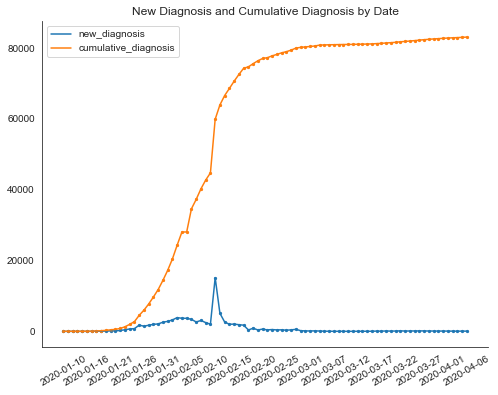

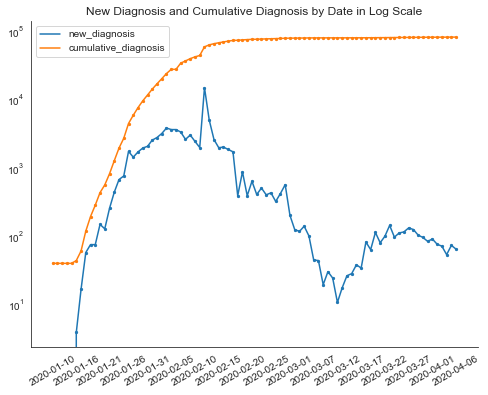

In [5]:
double_line_plot(df, 'new_diagnosis', 'cumulative_diagnosis', log = False)
double_line_plot(df, 'new_diagnosis', 'cumulative_diagnosis', log = True)

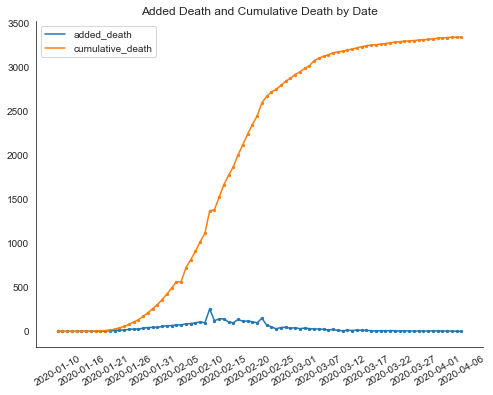

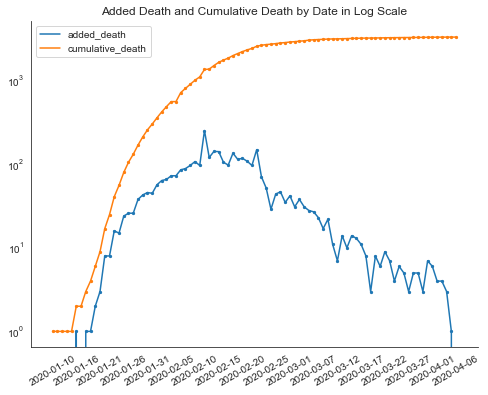

In [6]:
double_line_plot(df, 'added_death', 'cumulative_death', log = False)
double_line_plot(df, 'added_death', 'cumulative_death', log = True)

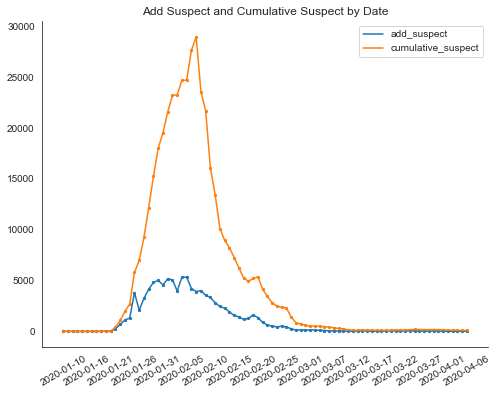

In [7]:
double_line_plot(df, 'add_suspect', 'cumulative_suspect', log = False)

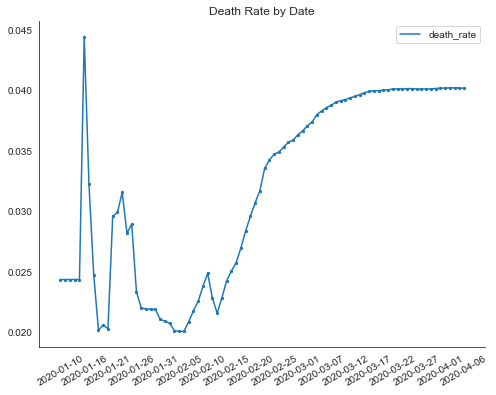

In [8]:
df['death_rate'] = df['cumulative_death'] / df['cumulative_diagnosis']
single_line_plot(df, 'death_rate')

### By weekday and month

In [9]:
print(list(df))

['date', 'add_suspect', 'cumulative_suspect', 'new_diagnosis', 'cumulative_diagnosis', 'added_death', 'cumulative_death', 'month', 'day', 'weekday', 'death_rate']


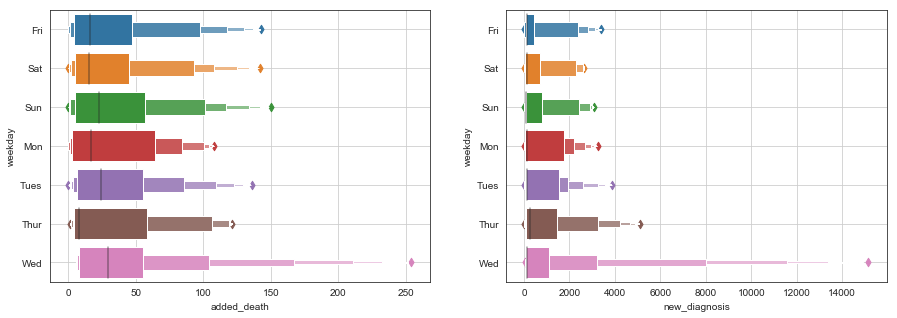

In [10]:
fg,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxenplot(data=df, y='weekday', x='added_death', scale='exponential',ax=ax[0])
ax[0].grid()
sns.boxenplot(data=df, y='weekday', x='new_diagnosis', scale='exponential',ax=ax[1])
ax[1].grid()

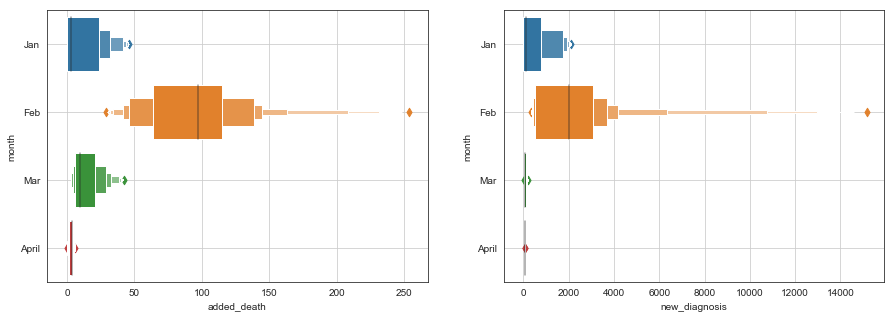

In [11]:
fg,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxenplot(data=df, y='month', x='added_death', scale='exponential',ax=ax[0])
ax[0].grid()
sns.boxenplot(data=df, y='month', x='new_diagnosis', scale='exponential',ax=ax[1])
ax[1].grid()

## China By Province

In [41]:
f_path = date_path + sorted(date_files)[-1]
print("Loading:", f_path)
df = pd.read_csv(f_path)
df['death_rate'] = df['cumulative_death'] / df['cumulative_diagnosis']
df.head()

Loading: ../../data/midas_china_mst/by_date/2020-04-06.csv


,province,add_suspect,cumulative_suspect,new_diagnosis,cumulative_diagnosis,added_death,cumulative_death,date,month,day,weekday,death_rate
0,Beijing,1,4,0,587,0,8,2020-04-06,April,6.0,Mon,0.013629
1,Taiwan Province,0,0,10,373,0,5,2020-04-06,April,6.0,Mon,0.013405
2,Xinjiang Uygur Autonomous Region,0,0,0,76,0,3,2020-04-06,April,6.0,Mon,0.039474
3,Ningxia Hui Autonomous Region,0,0,0,75,0,0,2020-04-06,April,6.0,Mon,0.000000
4,Qinghai Province,0,0,0,18,0,0,2020-04-06,April,6.0,Mon,0.000000


In [52]:
prov_dict = {'Beijing':"北京", 
 'Taiwan Province':"台湾", 
 'Xinjiang Uygur Autonomous Region':"新疆",
 'Ningxia Hui Autonomous Region':"宁夏",
 'Qinghai Province':"青海",
 'Gansu province':"甘肃",
 'Shaanxi Province':"陕西",
 'Tibet Autonomous Region':"西藏",
 'Yunnan Province':"云南",
 'Guizhou Province':"贵州",
 'Sichuan Province':"四川",
 'Chongqing':"重庆",
 'Hainan':"海南",
 'Guangxi Zhuang Autonomous Region':"广西",
 'Guangdong Province':"广东",
 'Hunan Province':"湖南",
 'Hubei Province':"湖北",
 'Henan Province':"河南",
 'Tianjin':"天津",
 'Hebei Province':"河北",
 'Shanxi Province':"山西",
 'Inner Mongolia Autonomous Region':"内蒙古",
 'Liaoning Province':"辽宁",
 'Jilin Province':"吉林",
 'Hong Kong Special Administrative Region':"香港",
 'Heilongjiang Province':"黑龙江",
 'Jiangsu Province':"江苏",
 'Zhejiang Province':"浙江",
 'Anhui Province':"安徽",
 'Fujian Province':"福建",
 'Jiangxi Province':"江西",
 'Shandong Province':"山东",
 'Shanghai':"上海",
 'Macau Special Administrative Region':"澳门"}

In [53]:
df['province_chn'] = df['province'].map(prov_dict)
df.head()

,province,add_suspect,cumulative_suspect,new_diagnosis,cumulative_diagnosis,added_death,cumulative_death,date,month,day,weekday,death_rate,province_chn
0,Beijing,1,4,0,587,0,8,2020-04-06,April,6.0,Mon,0.013629,北京
1,Taiwan Province,0,0,10,373,0,5,2020-04-06,April,6.0,Mon,0.013405,台湾
2,Xinjiang Uygur Autonomous Region,0,0,0,76,0,3,2020-04-06,April,6.0,Mon,0.039474,新疆
3,Ningxia Hui Autonomous Region,0,0,0,75,0,0,2020-04-06,April,6.0,Mon,0.000000,宁夏
4,Qinghai Province,0,0,0,18,0,0,2020-04-06,April,6.0,Mon,0.000000,青海


In [60]:
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.faker import Faker

c = Map()
c.add("Death Rate", [list(z) for z in zip(df['province_chn'], df['death_rate'])], "china")
c.set_global_opts(title_opts=opts.TitleOpts(title="Death Rate by Province"),
                  visualmap_opts=opts.VisualMapOpts(max_=np.round(np.max(df['death_rate'])+.01,2), is_piecewise=True))
c.render_notebook()

In [33]:
[list(z) for z in zip(Faker.provinces, Faker.values())]

[['广东', 133],
 ['北京', 145],
 ['上海', 80],
 ['江西', 100],
 ['湖南', 25],
 ['浙江', 43],
 ['江苏', 55]]

In [32]:
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.faker import Faker

c = (
    Map()
    .add("商家A", [list(z) for z in zip(Faker.provinces, Faker.values())], "china")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Map-VisualMap（分段型）"),
        visualmap_opts=opts.VisualMapOpts(max_=200, is_piecewise=True),
    )
)
c.render_notebook()

# United States

### Current(as of 04/08/2020) overview for the U.S. 

In [2]:
pd.read_csv('total_test_by_state.csv').columns

Index(['state', 'positive', 'positiveScore', 'negativeScore',
       'negativeRegularScore', 'commercialScore', 'grade', 'score', 'negative',
       'pending', 'hospitalizedCurrently', 'hospitalizedCumulative',
       'inIcuCurrently', 'inIcuCumulative', 'onVentilatorCurrently',
       'onVentilatorCumulative', 'recovered', 'lastUpdateEt', 'checkTimeEt',
       'death', 'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips',
       'dateModified', 'dateChecked', 'notes', 'hash'],
      dtype='object')

In [3]:
states_current = pd.read_csv('total_test_by_state.csv')
# For the sake of this part, we'll only look at the following columns 
states_current = states_current[['state', 'positive', 'total']]
states_current.head()

,state,positive,total
0,AK,213,6913
1,AL,2229,18982
2,AR,946,13638
3,AZ,2575,33375
4,CA,15865,145329


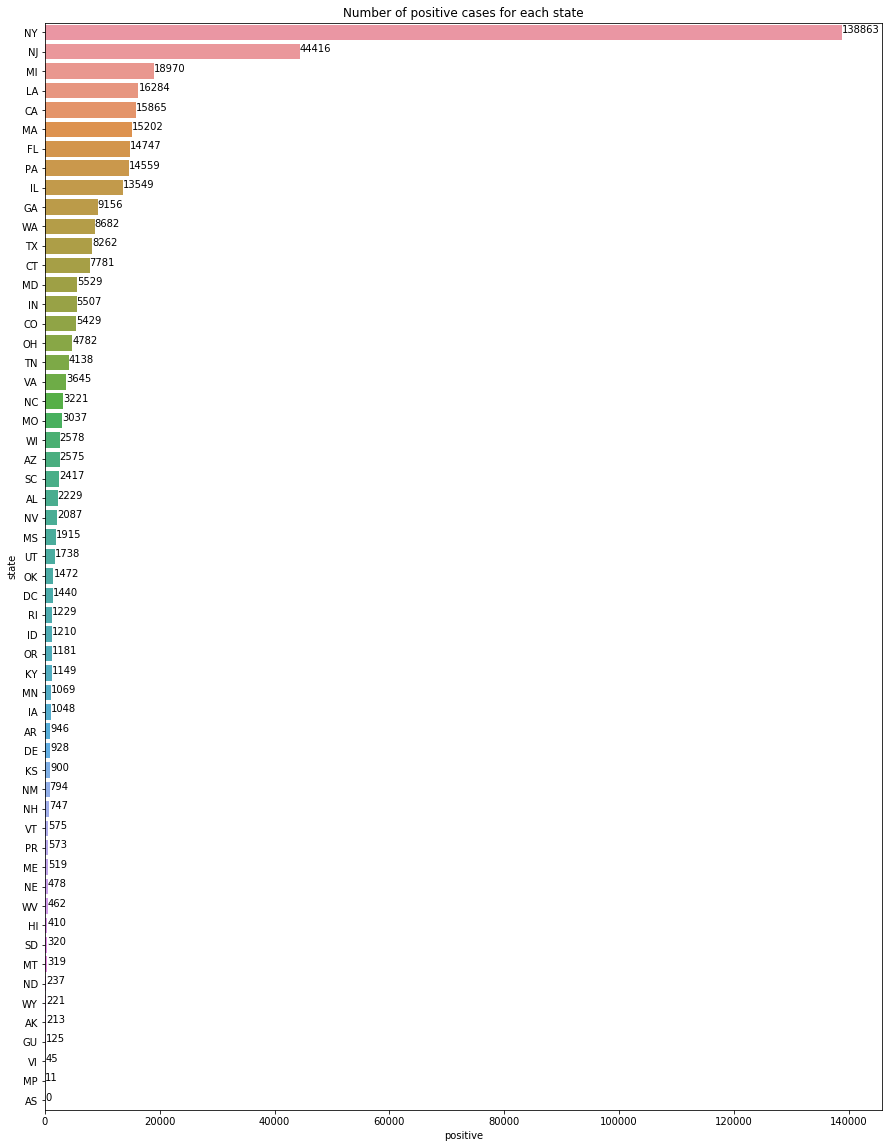

In [4]:
state_sort_by_pos = states_current.sort_values('positive', ascending = False)
plt.figure(figsize = [15, 20])
sns.barplot(x = 'positive', y = 'state', data = state_sort_by_pos)
for index, value in enumerate(state_sort_by_pos.positive):
    plt.text(value, index, str(value))
plt.title('Number of positive cases for each state');

It seems like NY dominates, it has the most cases and three times more cases than NJ. Some states like AS, MP don't have a lot of cases. It could be that NY, NYC in particular, is the financial center and is very touristy, and therefore a lot of people are gathered which increase the probability of infection. But we also suspect this could have something to do with the total number of tests performed. 

In [5]:
state_sort_by_pos = state_sort_by_pos.set_index('state')

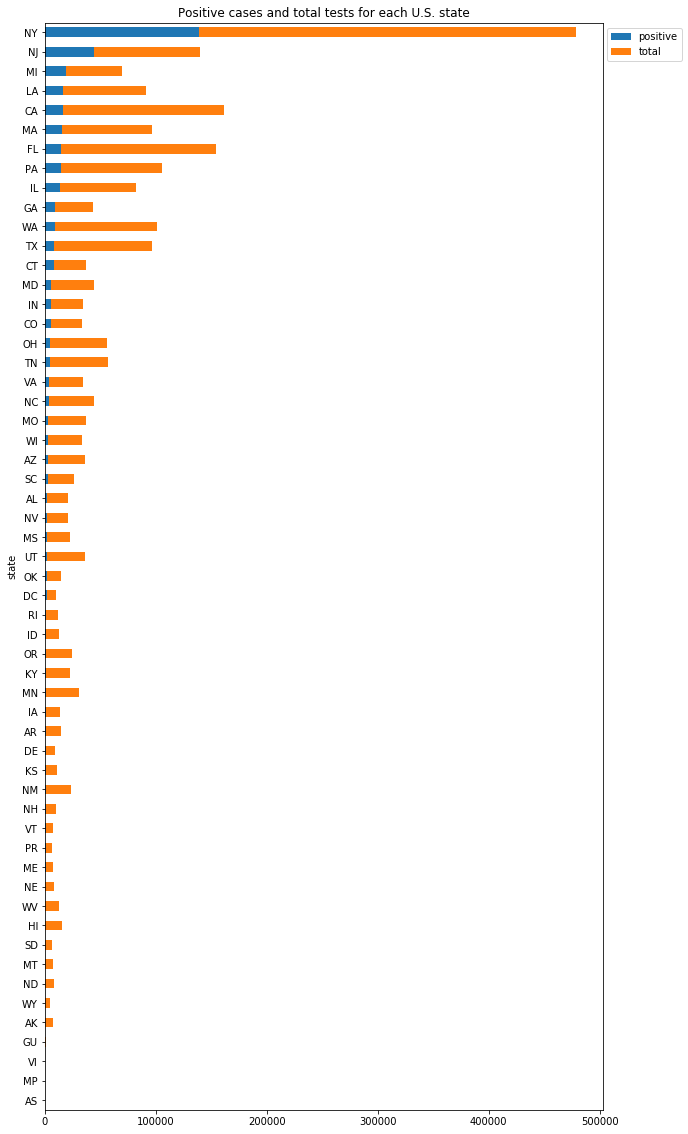

In [6]:
state_sort_by_pos.plot(kind='barh', stacked=True, figsize = [10, 20])
plt.gca().invert_yaxis()
plt.title('Positive cases and total tests for each U.S. state')
plt.legend(bbox_to_anchor=(1.15, 1));

It turns out states with more confirmed cases have performed more tests. Some states haven't performed many tests, which is worrying.

Let's check the percentages of confirmed cases:

In [7]:
state_sort_by_ratio = state_sort_by_pos.copy()
state_sort_by_ratio['percentage'] = round((state_sort_by_pos.positive/state_sort_by_pos.total) * 100, 1)
state_sort_by_ratio = state_sort_by_ratio.sort_values('percentage', ascending = False).reset_index()

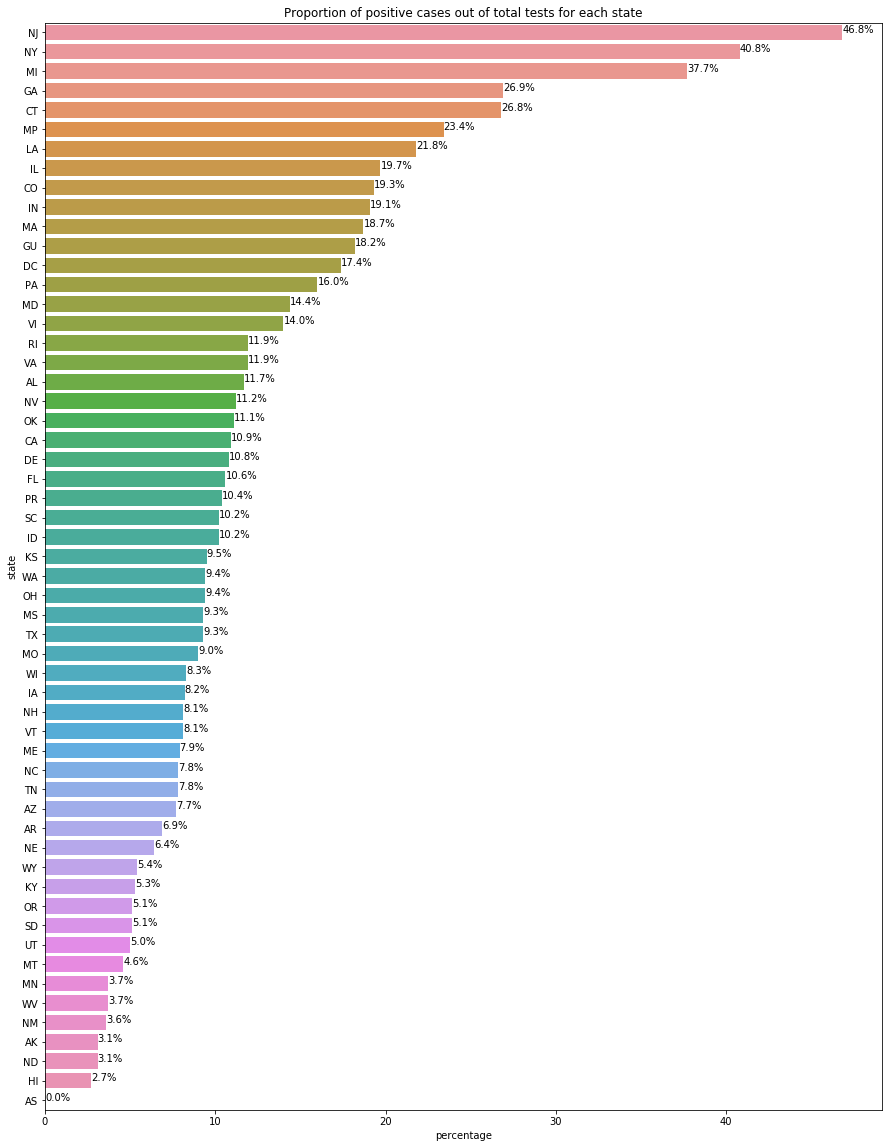

In [8]:
plt.figure(figsize = [15, 20])
sns.barplot(x = 'percentage', y = 'state', data = state_sort_by_ratio)
for index, value in enumerate(state_sort_by_ratio.percentage):
    plt.text(value, index, str(value) + '%')
plt.title('Proportion of positive cases out of total tests for each state');

NJ has less tests and less confirmed cases, but higher ratio of positive cases. 

Let's also examine the pencentages of test performed and states population. The census data we use is from 2018, which is a little out of date, but shouldn't be a big problem.

In [9]:
population = pd.read_csv('us_census_2018_population_estimates_states.csv')

In [10]:
test_ratio = population.merge(states_current, how = 'left', on = 'state')
test_ratio['percentage'] = round(test_ratio.total*100/test_ratio.population,2)
test_ratio = test_ratio.sort_values('percentage', ascending = False)

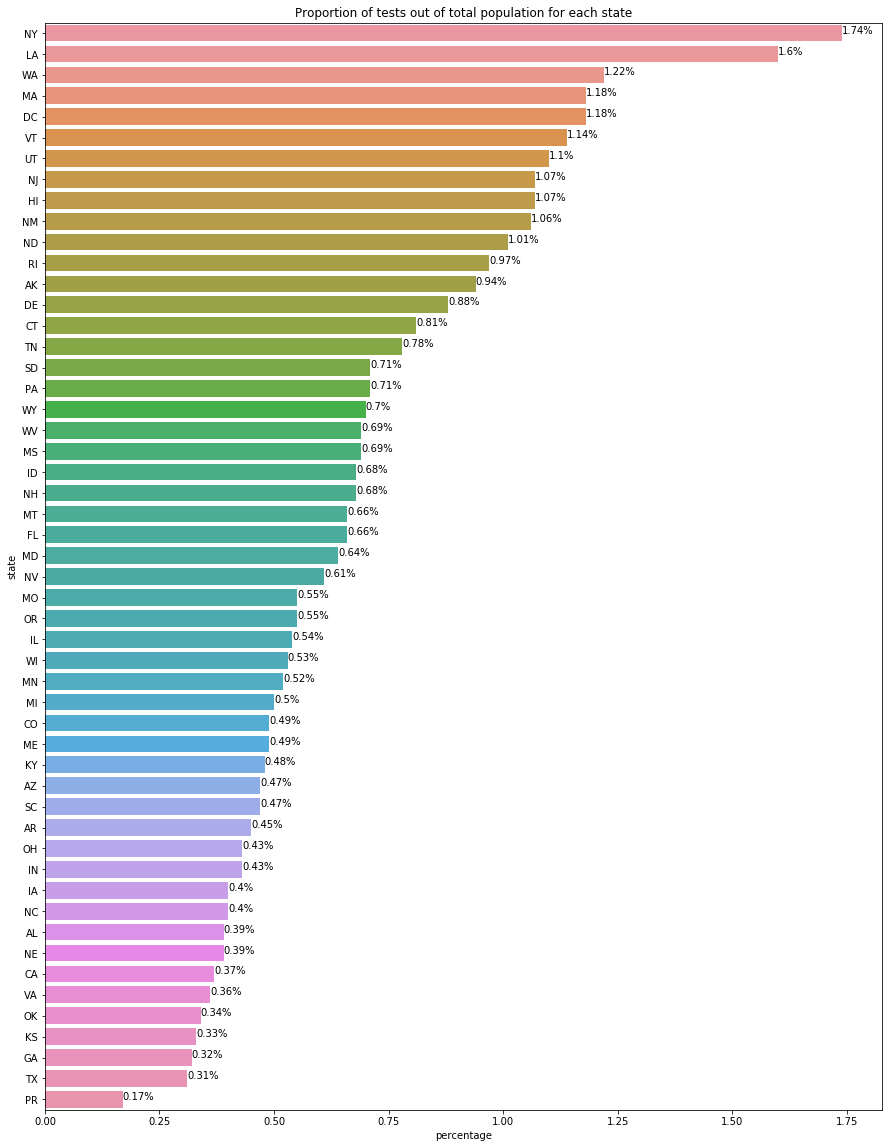

In [11]:
plt.figure(figsize = [15, 20])
sns.barplot(x = 'percentage', y = 'state', data = test_ratio)
for index, value in enumerate(test_ratio.percentage):
    plt.text(value, index, str(value) + '%')
plt.title('Proportion of tests out of total population for each state');

Seems like although NY has the most confirmed cases, it is doing a good job on testing people.

### Confirmed cases and deaths for the U.S. overtime. 

After looking at the overall picture, we'll look at the trend of confirmed cases and deaths for each state overtime. 

In [12]:
us_confirmed = pd.read_csv('time_series_covid19_confirmed_US.csv')
us_deaths = pd.read_csv('time_series_covid19_deaths_US.csv')

In [13]:
us_confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,55,56,58,69,77,82,84,93,112,113
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0,0,0,2,6,6,6,6,6,6
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,100,127,174,239,286,316,316,452,475,513
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,22,23,30,30,30,30,37,40,42,43


In [14]:
us_deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,1,1,1,2,3,3,4,4,4,4
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0,0,0,0,1,1,1,1,1,1
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,3,3,6,8,11,12,15,18,20,21
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,0,0,0,0,0,0,0,0,1,1


In [15]:
dates = us_confirmed.columns.tolist()[11:]

First look at the trends throughout the U.S.:

In [16]:
us_confirmed_total = np.sum(us_confirmed)[dates].values
us_death_total = np.sum(us_deaths)[dates].values

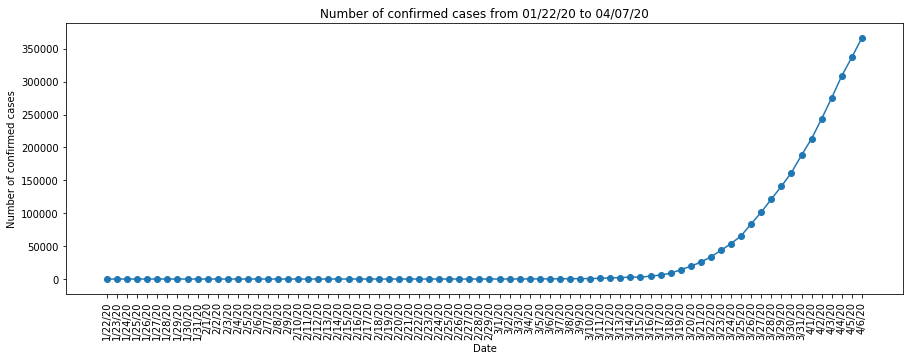

In [28]:
plt.figure(figsize = (15,5))
plt.plot(dates,us_confirmed_total)
plt.scatter(dates, us_confirmed_total)
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.title('Number of confirmed cases from 01/22/20 to 04/07/20');

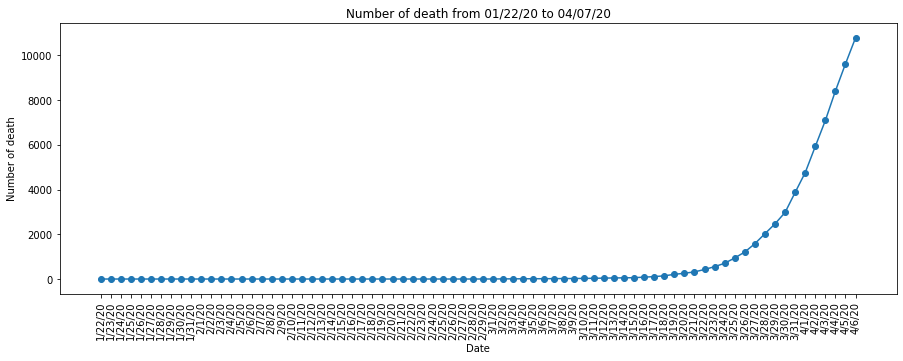

In [29]:
plt.figure(figsize = (15,5))
plt.plot(dates,us_death_total)
plt.scatter(dates,us_death_total)
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Number of death')
plt.title('Number of death from 01/22/20 to 04/07/20');

Number of confirmed cases started to increase on March 15th, number of deaths started to around the same time. That makes sense since the U.S. started to increase testing at around that time.

Let's take a look at the subset after 3/15/20:

In [19]:
idx = dates.index('3/15/20')
focus_dates = dates[idx:]
focus_confirm = us_confirmed_total[idx:]
focus_death = us_death_total[idx:]

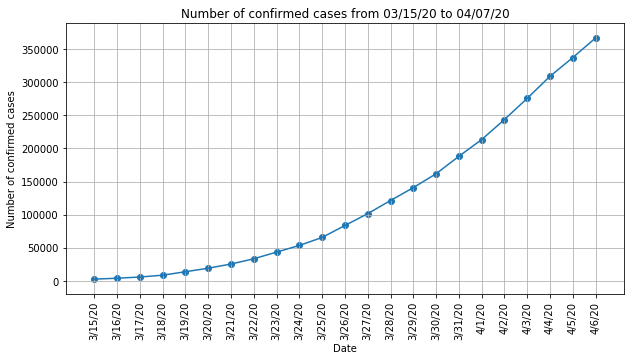

In [30]:
plt.figure(figsize = (10,5))
plt.grid()
plt.plot(focus_dates,focus_confirm)
plt.scatter(focus_dates,focus_confirm)
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.title('Number of confirmed cases from 03/15/20 to 04/07/20');

Seems like the trend has become tiny bit smoother on April 4th. 

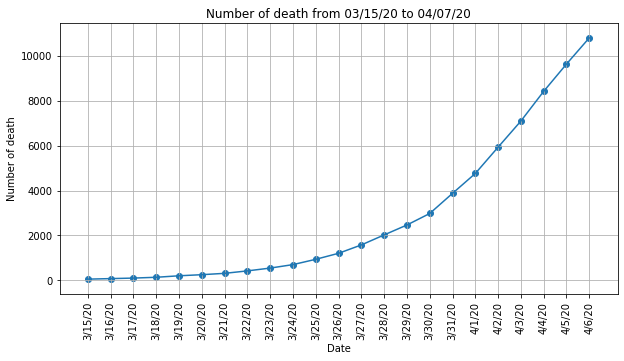

In [31]:
plt.figure(figsize = (10,5))
plt.grid()
plt.plot(focus_dates,focus_death)
plt.scatter(focus_dates,focus_death)
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Number of death')
plt.title('Number of death from 03/15/20 to 04/07/20');

The slope kept getting steeper since March 30th.

Since the data from Jan. and Feb. are rather flat, for the rest of the EDA, we'll focus on data in March and April.

In [23]:
idx = dates.index('3/1/20')
dates_no = dates[:idx]
dates_focus = dates[idx:]
us_confirmed_focus = us_confirmed.drop(columns = dates_no)
us_death_focus = us_deaths.drop(columns = dates_no)

### Confirmed cases and deaths for the U.S. on the state level overtime. 

In [24]:
confirmed_by_state = us_confirmed_focus.groupby('Province_State').sum()[dates_focus].reset_index()
death_by_state = us_death_focus.groupby('Province_State').sum()[dates_focus].reset_index()

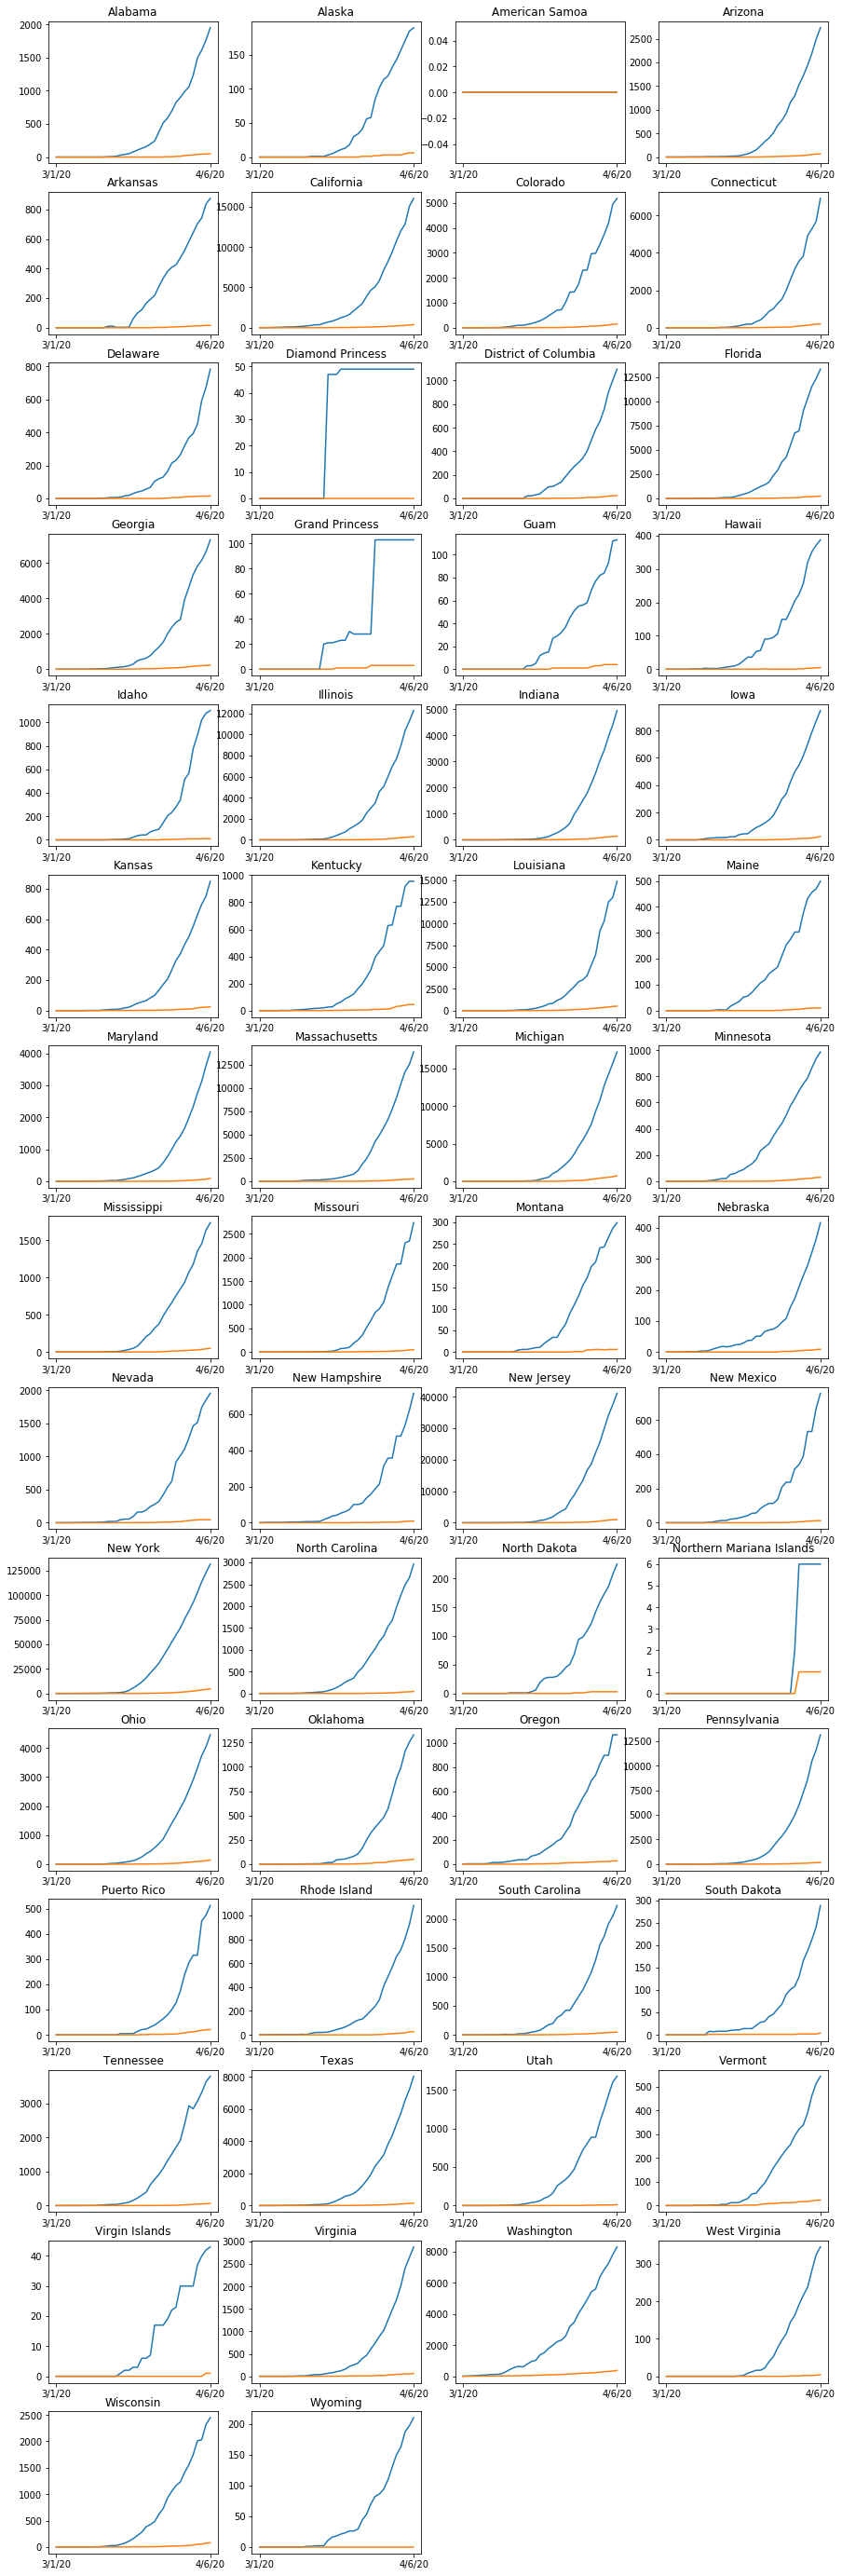

In [33]:
plt.figure(figsize = (15,50))
for i in np.arange(0,58,4):
    plt.subplot(15,4,i+1)
    plt.plot(confirmed_by_state.loc[i, dates_focus], label = 'confirmed')
    plt.plot(death_by_state.loc[i, dates_focus], label = 'death')
    plt.xticks([0,len(dates_focus)-1])
    plt.title(confirmed_by_state.loc[i, 'Province_State'])
    
    plt.subplot(15,4,i+2)
    plt.plot(confirmed_by_state.loc[i+1, dates_focus], label = 'confirmed')
    plt.plot(death_by_state.loc[i+1, dates_focus], label = 'death')
    plt.xticks([0,len(dates_focus)-1])
    plt.title(confirmed_by_state.loc[i+1, 'Province_State'])
    
    if i == 56:
        break
    
    plt.subplot(15,4,i+3)
    plt.plot(confirmed_by_state.loc[i+2, dates_focus], label = 'confirmed')
    plt.plot(death_by_state.loc[i+2, dates_focus], label = 'death')
    plt.xticks([0,len(dates_focus)-1])
    plt.title(confirmed_by_state.loc[i+2, 'Province_State'])
    
    plt.subplot(15,4,i+4)
    plt.plot(confirmed_by_state.loc[i+3, dates_focus], label = 'confirmed')
    plt.plot(death_by_state.loc[i+3, dates_focus], label = 'death')
    plt.xticks([0,len(dates_focus)-1])
    plt.title(confirmed_by_state.loc[i+3, 'Province_State'])

Despite the number difference, all 50 states follow a simialr increasing trend. 